<a href="https://www.kaggle.com/code/chaitanyachandra/08-ml-r-squared-regression-model-selection?scriptVersionId=268399706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# R² (R-squared) — Coefficient of Determination



## Concept

**Goal:**
To measure **how well a regression model fits** the actual data — i.e., how much of the variation in the target variable $( y )$ is explained by your model.



## Explanation

### 1. Two Situations to Compare


1. **Regression line** → a line fitted by the model (using ordinary least squares).
2. **Average line** → a horizontal line at the mean of all $( y )$-values.



### 2. Residual Sum of Squares (SSR or RSS)

When you draw the **regression line**, you measure how far each real data point $( y_i )$ is from the predicted point $( \hat{y}_i )$ on the line.

$SS_{res} = \sum (y_i - \hat{y}_i)^2$

✅ This tells you how much **error** (unexplained variance) your model still has after fitting.



### 3. Total Sum of Squares (SST)

Now imagine no model at all — just an **average line** through the mean of all $( y )$-values $(( \bar{y} ))$.

$
SS_{tot} = \sum (y_i - \bar{y})^2
$

✅ This shows **total variation** in the data — how much all $( y_i )$ values differ from their average.



### 4. Formula for R²

$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$



### 5. Intuition

* If your regression line fits well → $( SS_{res} )$ is **small**, so $( R^2 )$ is **close to 1** ✅
* If your regression line fits poorly → $( SS_{res} )$ is **large**, so $( R^2 )$ is **close to 0** ❌



### 6. Typical R² Values and Interpretation

| R² Value      | Interpretation                                                                     |
| - | - |
| **1.0**       | Perfect fit — model predicts every point exactly (almost impossible in real data). |
| **0.9**       | Excellent fit — model explains 90% of data variation.                              |
| **0.7 – 0.9** | Good fit — quite reliable.                                                         |
| **0.4 – 0.7** | Weak fit — model misses a lot of variation.                                        |
| **< 0.4**     | Poor fit — not a good model.                                                       |
| **< 0**       | Model is worse than just using the mean — model is *nonsense* for this data.       |



### 8. Summary

> R² tells you **how much better your model is than just predicting the average** every time.

If your model doesn’t improve much over just using the mean, R² will be low.
If it explains most of the variation, R² will be high.

---

## Adjusted R² (Adjusted R Squared)

### Definition

**Adjusted R²** is a modified version of **R² (Coefficient of Determination)** that adjusts for the number of independent variables in a regression model.
It penalizes the model for adding unnecessary variables that do not significantly improve the prediction.



## ⚠️ Problem with R²

When you **add more variables** (X₃, X₄, etc.) to a regression model:

* The **total sum of squares (SSₜₒₜ)** remains the same (it depends only on actual y values).
* The **residual sum of squares (SSᵣₑₛ)** **can only decrease or stay the same** because:

  * The **Ordinary Least Squares (OLS)** method minimizes SSᵣₑₛ.
  * If the new variable helps, SSᵣₑₛ decreases.
  * If it doesn’t help, OLS sets its coefficient (b₃) to **zero**, keeping SSᵣₑₛ unchanged.
* Therefore, **R² never decreases**, even if the new variable is useless.

🧠 **Result:**
You might end up with a model that includes unnecessary variables just because R² keeps increasing.


## 💡 Solution: Adjusted R²

### Formula

$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$

Where:

* **n** = Number of observations (sample size)
* **k** = Number of independent variables


### How It Works

* As **k (number of predictors)** increases, the **denominator** ((n - k - 1)) decreases.
* This makes the ratio larger → leading to **lower Adjusted R²**.
* Therefore, **Adjusted R² penalizes** adding variables that don’t significantly improve the model.


### Key Insight

* Adding a new variable will **only increase Adjusted R²** if the variable provides a **meaningful improvement** in prediction.
* If it doesn’t, Adjusted R² will **decrease** — discouraging overfitting.


##  Summary

| Concept           | Description                                                                                                |
| ----------------- | ---------------------------------------------------------------------------------------------------------- |
| **R²**            | Measures model fit — how much of y’s variation is explained by x’s.                                        |
| **Issue with R²** | Always increases when new variables are added, even useless ones.                                          |
| **Adjusted R²**   | Adds a penalty for adding variables — increases only if the new variable significantly improves model fit. |
| **Purpose**       | Helps build parsimonious (simple but effective) models.                                                    |


## Intuitive Understanding

* R² = “How well are we fitting the data?”
* Adjusted R² = “How well are we fitting the data **without overcomplicating** the model?”

---


### **Solve:**

You are given an [Energy.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Energy.csv)  dataset containing several independent features (e.g., temperature, pressure, etc.) and one dependent variable (Energy Output).

Your task is to compare different regression models and evaluate their performance.


### **Tasks:**

1. **Load and explore** the dataset from [Energy.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Energy.csv).
2. **Split** the dataset into training and testing sets (80% train, 20% test).
3. Train the following regression models:

   * **Linear Regression**
   * **Polynomial Regression (degree = 4)**
   * **Support Vector Regression (RBF kernel)**
   * **Decision Tree Regression**
   * **Random Forest Regression (n_estimators = 100)**
4. For **Support Vector Regression**, make sure to:
   * Apply **feature scaling** to both the independent and dependent variables.
   * **Inverse transform** predictions to their original scale.
5. Compute the **R² score** for each model and store the results in a dictionary named `scores`.
6. **Plot a bar chart** comparing the R² scores of all models.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
# variables
scores = {}

In [3]:
# read CSV
data = pd.read_csv("/kaggle/input/data-csv/Energy.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# split dependent and independent cells
independent_x = data.iloc[:, :-1].values
dependent_y = data.iloc[:, -1].values

In [5]:
# split train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent_x, dependent_y, random_state=0, test_size=0.2)

x_train, x_test, y_train, y_test

(array([[  11.22,   43.13, 1017.24,   80.9 ],
        [  13.67,   54.3 , 1015.92,   75.42],
        [  32.84,   77.95, 1014.68,   45.8 ],
        ...,
        [  16.81,   38.52, 1018.26,   75.21],
        [  12.8 ,   41.16, 1022.43,   86.19],
        [  32.32,   67.9 , 1006.08,   37.93]]),
 array([[  28.66,   77.95, 1009.56,   69.07],
        [  17.48,   49.39, 1021.51,   84.53],
        [  14.86,   43.14, 1019.21,   99.14],
        ...,
        [  12.24,   44.92, 1023.74,   88.21],
        [  27.28,   47.93, 1003.46,   59.22],
        [  17.28,   39.99, 1007.09,   74.25]]),
 array([473.93, 467.87, 431.97, ..., 459.01, 462.72, 428.12]),
 array([431.23, 460.01, 461.14, ..., 473.26, 438.  , 463.28]))

In [6]:
# Multi-Linear regression 
lr = LinearRegression()
lr.fit(x_train, y_train)
scores["Linear"] = r2_score(y_test, lr.predict(x_test))

In [7]:
# Polynomial Linear Regression
pr = PolynomialFeatures(degree=4)
lr2 = LinearRegression()
lr2.fit(pr.fit_transform(x_train), y_train)
scores["Polynomial"] = r2_score(y_test, lr2.predict(pr.transform(x_test)))

In [8]:
# Support Vector Regression
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_sc = sc_x.fit_transform(x_train)                   
x_test_sc  = sc_x.transform(x_test)                      

y_train_2d = np.asarray(y_train).reshape(-1, 1)             
y_train_sc = sc_y.fit_transform(y_train_2d).ravel()      

svm = SVR(kernel='rbf')                                     
svm.fit(x_train_sc, y_train_sc)                             

y_pred_sc = svm.predict(x_test_sc)                          
y_pred = sc_y.inverse_transform(y_pred_sc.reshape(-1,1)).ravel()  

scores["Support Vector"] = r2_score(y_test, y_pred) 

In [9]:
# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
scores["Decision Tree"] = r2_score(y_test, dt.predict(x_test)) 

In [10]:
# Random Forest Regression
rfr = RandomForestRegressor(random_state=0, n_estimators=10)
rfr.fit(x_train, y_train)
scores["Random Forest"] = r2_score(y_test, rfr.predict(x_test)) 

In [11]:
scores

{'Linear': 0.9325315554761303,
 'Polynomial': 0.9458193553910528,
 'Support Vector': 0.9480793454190317,
 'Decision Tree': 0.9207071604405337,
 'Random Forest': 0.9615908334363876}

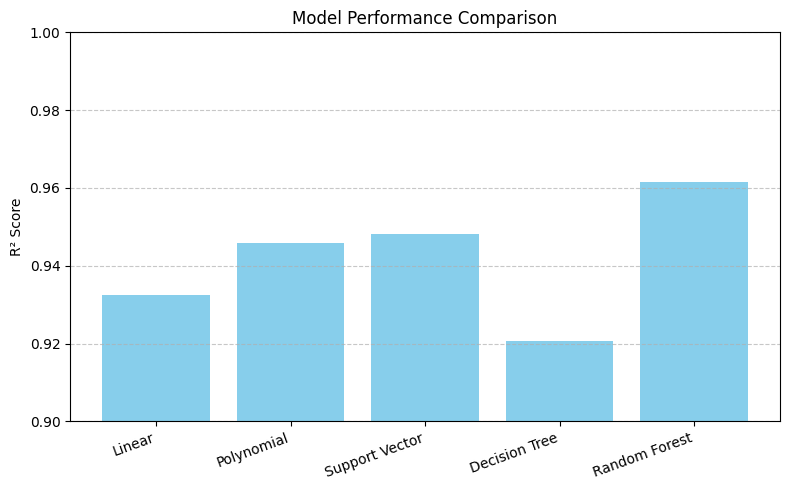

In [12]:
models = list(scores.keys())
values = list(scores.values())

# Plot
plt.figure(figsize=(8,5))
plt.bar(models, values, color='skyblue')
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=20, ha='right')
plt.ylim(0.9, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()